# Introduction


# Questions

##### 1. Identify the top five films by revenue 
##### 2. Identify the top five films by budget 
##### 3. the relation between revune and budget 
##### 4. What is the percentage share (revenue) of each of the top ten movies?
##### 5. How did the monthly average revenue change during the year ? and what is the best month for relase new film ? 

# Data Wrangling


In [1]:
#import libs and load datasets
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df=pd.read_csv('tmdb-movies.csv')

In [2]:
#show first rows in data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# show data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# size of data set
df.shape

(10866, 21)

In [5]:
# how many columus are duplicated 
df.duplicated().sum()

1

In [6]:
# null values in each columuns 
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# summary statistics for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### tip 
after explore data notice 
1. some of data types of the columns are not correctly identified (
2.   one dublicated value 
3. columun with all null info (homepage,  tagline)
4. null values in (keywords , production_companies ,director , 

In [8]:
# remove most null columns 
df.drop(['homepage','tagline','keywords'],axis=1,inplace=True)

In [9]:
# this index has not any meanings we must reset it and pick one id for data set 
df.drop(['imdb_id','id'],axis=1,inplace=True)

In [10]:
# remove duplicates values  
df.drop_duplicates(inplace=True)

In [11]:
# fill null values  wiht mean
#df.dropna(inplace=True)
df.fillna(np.mean)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [12]:
df.shape

(10865, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   overview              10861 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

In [14]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


 # Exploratory

In [15]:
# convert money to be by millions  and into integer data type

money=['revenue','budget_adj','revenue_adj','budget']
for col in money:
    df[col]=df[col].apply(lambda  x : x/1000000).astype(int)
   
df.head(2)



,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150,1513,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137,1392
1,28.419936,150,378,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137,348


In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int32  
 2   revenue               10865 non-null  int32  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   overview              10861 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  int32  
 15  revenue_adj        

In [17]:
#rename cols to be by milions 
df.rename(columns={'budget': 'budget_by_m', 'budget_adj': 'budget_adj_by_m','revenue_adj': 'revenue_adj_by_m','revenue':'revenue_by_m'}, inplace=True)
df.columns

Index(['popularity', 'budget_by_m', 'revenue_by_m', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj_by_m', 'revenue_adj_by_m'],
      dtype='object')

In [18]:
# convert realse data into datetime 
df['release_date']=pd.to_datetime(df['release_date'])


In [19]:
# add new column for month
df['month']=pd.DatetimeIndex(df['release_date']).month


In [20]:
df.head(2)

,popularity,budget_by_m,revenue_by_m,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj_by_m,revenue_adj_by_m,month
0,32.985763,150,1513,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137,1392,6
1,28.419936,150,378,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137,348,5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget_by_m           10865 non-null  int32         
 2   revenue_by_m          10865 non-null  int32         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   overview              10861 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

### note after data manipulation  , memory usage has decreased to 1.3MB

# Data Analysis

# Q1 Identify the top five films by revenue 


In [22]:
df_top5_rev=df[['original_title','revenue_by_m']].sort_values(by='revenue_by_m',ascending=False).head(5)
df_top5_rev

,original_title,revenue_by_m
1386,Avatar,2781
3,Star Wars: The Force Awakens,2068
5231,Titanic,1845
4361,The Avengers,1519
0,Jurassic World,1513


Text(0.5, 1.0, 'Top 5 Films by Revenue')

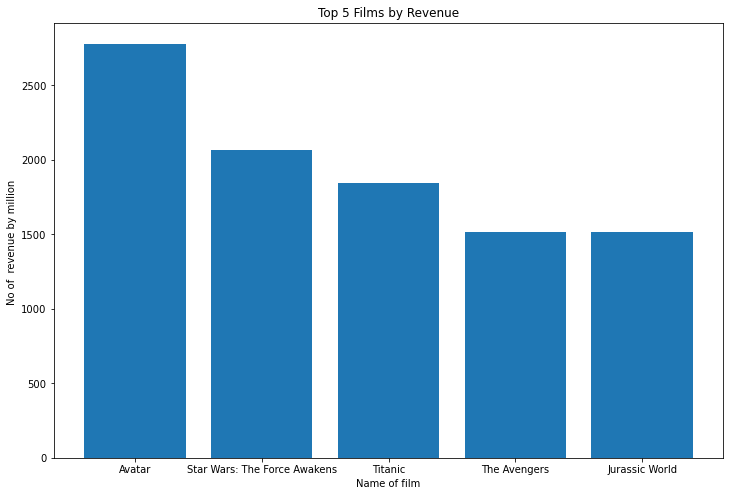

In [23]:
#plot bar chart show the top five films 
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax=plt.bar(df_top5_rev['original_title'],df_top5_rev['revenue_by_m'])
plt.xlabel("Name of film")
plt.ylabel("No of  revenue by million ")
plt.title("Top 5 Films by Revenue")



> ### bar shows that Avatart is is the most films acheving revenue more thann 2700 milion 
> ### and Jurassic Film scoreing about 1500 milion in fifth place 

 # Q2 Identify the top five films by budget 

In [24]:
df_top5_bud=df[['original_title','budget_by_m']].sort_values(by='budget_by_m',ascending=False).head(5)
df_top5_bud

,original_title,budget_by_m
2244,The Warrior's Way,425
3375,Pirates of the Caribbean: On Stranger Tides,380
7387,Pirates of the Caribbean: At World's End,300
14,Avengers: Age of Ultron,280
6570,Superman Returns,270


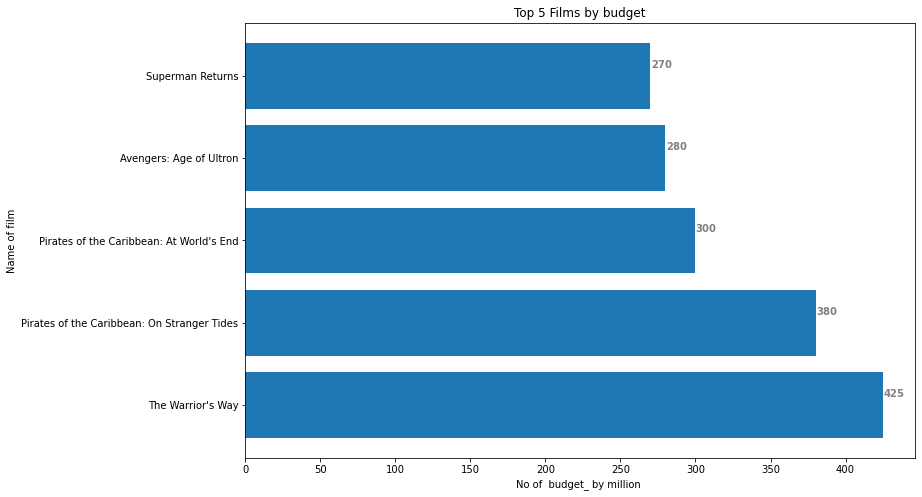

In [25]:
# we used horizontal bar beacause  the name of films is long 
fig = plt.gcf()
fig.set_size_inches(12, 8)
ax=plt.barh(df_top5_bud['original_title'],df_top5_bud['budget_by_m'])
plt.ylabel("Name of film")
plt.xlabel("No of  budget_ by million ")
plt.title("Top 5 Films by budget")
#  Annotate Bars by it's values 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 




> ### horziontal bar shows top 5 films by budgets 
> ### The warrior's way  is scoreing 425 milion as the most film in budget 
> ### next in second and third place Piarates of caribeean Films (on stranger tides , at world's end ) 
> ### and Superman Returns has the fifth place 

# Q3  the relation between revune and budget 

Text(0.5, 0, 'budget_by_m')

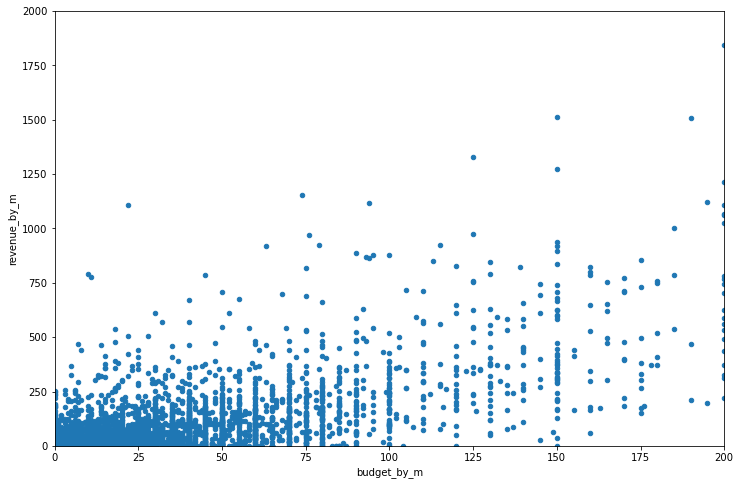

In [26]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.scatter(x=df['budget_by_m'],y=df['revenue_by_m'],s=20)

plt.xlim(0,200)
plt.ylim(0,2000,100)

plt.ylabel("revenue_by_m")
plt.xlabel("budget_by_m")

> ### scatter shows relationship between budget and revenue 
> ### the budget of films under 50 milion always acheving revenue between 100 until 200 milion
>### but it's looks like linear , no strong relations between revenue and budget 

### Q4 What is the percentage share (revenue) of each of the top ten movies?

In [27]:
df_by_revenue=df[['original_title','revenue_by_m']].sort_values(by='revenue_by_m',ascending=False)


Text(0.5, 1.5, ' Pie chart depicting the share of top ten movies by revenue')

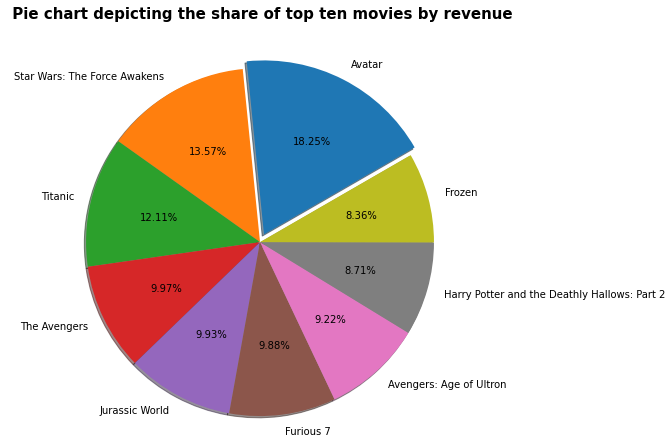

In [28]:
plt.pie(x='revenue_by_m',labels=df_by_revenue.head(9)['original_title'],data=df_by_revenue.head(9),autopct='%.2f%%',explode=[0.1,0,0,0,0.,0,0,0,0],startangle =30,shadow=True,radius=2)
plt.title(' Pie chart depicting the share of top ten movies by revenue',y=1.5,size=15,fontweight='bold',color='black')

>### the pie char shows the share of top ten movies by revenue 
>### Avatr take about 19 % of revenue then Star wars take about 14 % and Forzen has 8.5 % of revenue 

# Q5 How did the monthly average revenue change during the year ? and what is the best month for relase new film ? 

In [29]:
df_by_month=df.groupby('month')['revenue_by_m'].sum()
df_by_month

month
1     12838
2     19649
3     31226
4     26243
5     50290
6     61487
7     45220
8     25285
9     25479
10    29147
11    45731
12    58000
Name: revenue_by_m, dtype: int32

<AxesSubplot:title={'center':'Average monthly revenue'}, xlabel='month'>

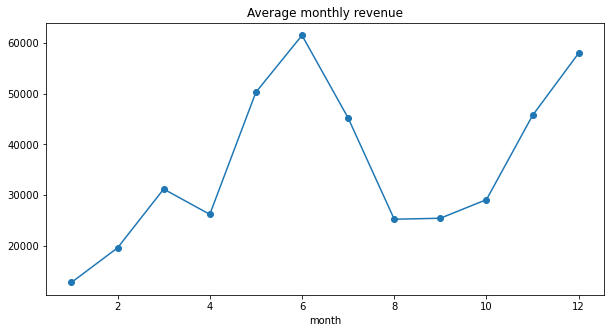

In [30]:
df_by_month.plot(kind='line',figsize=(10,5),marker='o',title='Average monthly revenue')


>### we note that moths  [5,6,11,12] the most months of getting revenue in the year 

# Conclusions

> * ###  we note that avatar is the most films acheving revenune 
> * ### the warriors way is most films of budget 
> * ### there is weak relation between budget and revenune high budget does not mean  high revenue 
> * ### we note that moths  [5,6,11,12] the most months of getting revenue in the year 


 # Limitations

> ### there are shortage of tagline column which disable analysis >
> ### can't show strong relationship between revenue and budget